# Project Description


AtliQ Agriculture is an AI company that is developing a mobile application to help farmers detect potato diseases early. The app will use a convolutional neural network (CNN) to analyze photos of potato plants and identify any signs of disease.

CNNs are a type of deep learning algorithm that are particularly well-suited for image recognition tasks. CNNs work by extracting features from images and then using those features to classify the images.

In the case of the potato disease detection app, the CNN will be trained on a dataset of images of potato plants that are both healthy and diseased. The CNN will learn to identify the features of healthy and diseased plants, and it will use that knowledge to classify new images of potato plants.

Once the CNN is trained, it will be deployed to the mobile application. Farmers will be able to use the app to take photos of their potato plants and get a diagnosis from the CNN. If the CNN detects any signs of disease, it will recommend appropriate treatment to the farmer.

The potato disease detection app is a promising new tool that could help farmers save money and improve their yields. By detecting diseases early, farmers can prevent the spread of disease and minimize the damage to their crops.

Here is a more detailed description of how the CNN will be used to detect potato diseases:

The CNN extracts features from the photo and uses those features to classify the image.
The CNN outputs a prediction of whether the plant is healthy or diseased.

If the CNN detects that the plant is diseased, it will also recommend appropriate treatment to the farmer. This treatment may include applying fungicides or pesticides, or removing the diseased plant from the crop.

The potato disease detection app is still under development, but it has the potential to be a valuable tool for farmers. By detecting diseases early, the app can help farmers save money and improve their yields.

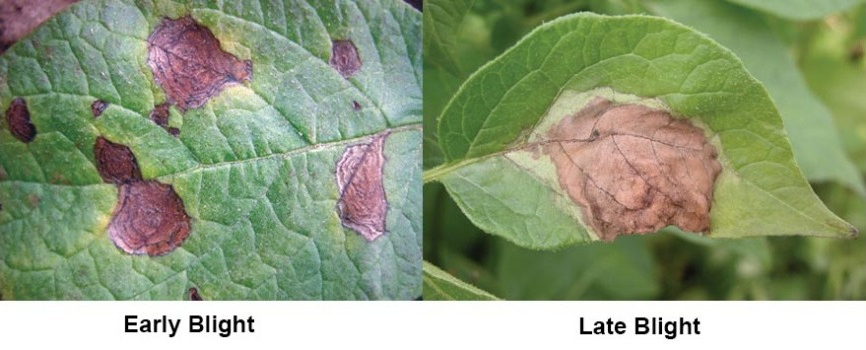

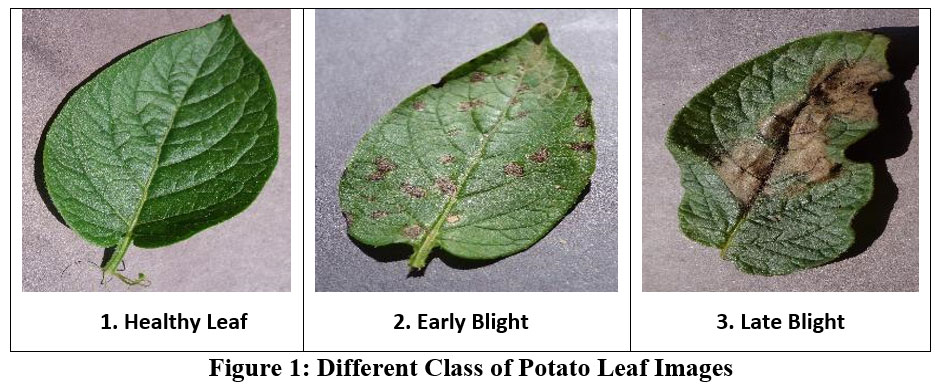

In [45]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

In [35]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [3]:
# Import Folder 
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [56]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [5]:
class_names=dataset.class_names

In [6]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
# Display the no of batches (size = 32) created
len(dataset)

68

In [ ]:
# Display more images from batch

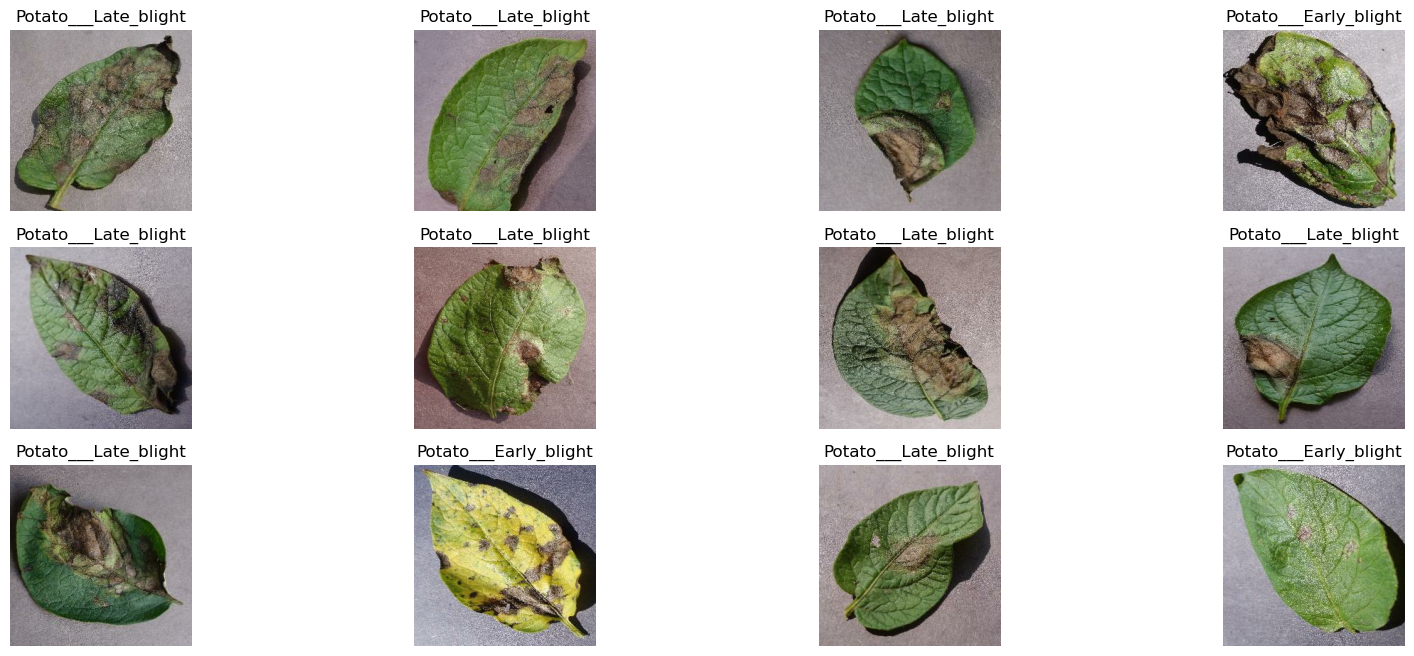

In [39]:
plt.figure(figsize=(20, 8))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

# Cache, Shuffle, and Prefetch the Dataset


In [20]:
# shuffle which helps to reduce overfitting, cache store the dataset in memory and acces multiple times prefetch mprove the performance of training 
# by loading the next batch of data

In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [41]:
for image_batch,label_size in dataset.take(i):
    print(image_batch[0].numpy()/255) # resize

[[[0.69411767 0.69411767 0.7254902 ]
  [0.6039216  0.6039216  0.63529414]
  [0.6862745  0.6862745  0.7176471 ]
  ...
  [0.78039217 0.76862746 0.79607844]
  [0.7882353  0.7764706  0.8039216 ]
  [0.8        0.7882353  0.8156863 ]]

 [[0.53333336 0.53333336 0.5647059 ]
  [0.7411765  0.7411765  0.77254903]
  [0.6901961  0.6901961  0.72156864]
  ...
  [0.7607843  0.7490196  0.7764706 ]
  [0.76862746 0.75686276 0.78431374]
  [0.78039217 0.76862746 0.79607844]]

 [[0.72156864 0.72156864 0.7529412 ]
  [0.6431373  0.6431373  0.6745098 ]
  [0.6627451  0.6627451  0.69411767]
  ...
  [0.77254903 0.7607843  0.7882353 ]
  [0.7764706  0.7647059  0.7921569 ]
  [0.78431374 0.77254903 0.8       ]]

 ...

 [[0.5294118  0.52156866 0.57254905]
  [0.5529412  0.54509807 0.59607846]
  [0.53333336 0.5254902  0.5764706 ]
  ...
  [0.65882355 0.6666667  0.7176471 ]
  [0.6392157  0.64705884 0.69803923]
  [0.6509804  0.65882355 0.70980394]]

 [[0.5647059  0.5568628  0.60784316]
  [0.5647059  0.5568628  0.60784316]


[[[0.8        0.79607844 0.81960785]
  [0.8156863  0.8117647  0.8352941 ]
  [0.827451   0.8235294  0.84705883]
  ...
  [0.74509805 0.7372549  0.78039217]
  [0.7411765  0.73333335 0.7764706 ]
  [0.7254902  0.7176471  0.7607843 ]]

 [[0.8352941  0.83137256 0.85490197]
  [0.827451   0.8235294  0.84705883]
  [0.8235294  0.81960785 0.84313726]
  ...
  [0.78039217 0.77254903 0.8156863 ]
  [0.78431374 0.7764706  0.81960785]
  [0.77254903 0.7647059  0.80784315]]

 [[0.85882354 0.85490197 0.8784314 ]
  [0.8392157  0.8352941  0.85882354]
  [0.8235294  0.81960785 0.84313726]
  ...
  [0.7529412  0.74509805 0.7882353 ]
  [0.7529412  0.74509805 0.7882353 ]
  [0.74509805 0.7372549  0.78039217]]

 ...

 [[0.5882353  0.5647059  0.6039216 ]
  [0.4862745  0.4627451  0.5019608 ]
  [0.33333334 0.30980393 0.34901962]
  ...
  [0.08627451 0.08627451 0.1254902 ]
  [0.1882353  0.1882353  0.22745098]
  [0.05882353 0.05882353 0.09803922]]

 [[0.41960785 0.39607844 0.43529412]
  [0.5254902  0.5019608  0.5411765 ]


# Creating a Layer for Resizing and Normalization


In [22]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [42]:
resize_and_rescale

# Data Augmentation

In [23]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

# Compiling the Model


In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,)

Epoch 1/10
54/54 [==============================] - 330s 5s/step - loss: 0.9063 - accuracy: 0.4716 - val_loss: 0.8863 - val_accuracy: 0.4792
Epoch 2/10
54/54 [==============================] - 247s 5s/step - loss: 0.7710 - accuracy: 0.6233 - val_loss: 0.6360 - val_accuracy: 0.7344
Epoch 3/10
54/54 [==============================] - 236s 4s/step - loss: 0.5418 - accuracy: 0.7737 - val_loss: 0.4082 - val_accuracy: 0.8281
Epoch 4/10
54/54 [==============================] - 281s 5s/step - loss: 0.3903 - accuracy: 0.8449 - val_loss: 0.3788 - val_accuracy: 0.8229
Epoch 5/10
54/54 [==============================] - 307s 6s/step - loss: 0.3248 - accuracy: 0.8686 - val_loss: 0.4304 - val_accuracy: 0.8542
Epoch 6/10
54/54 [==============================] - 324s 6s/step - loss: 0.2759 - accuracy: 0.8924 - val_loss: 0.1546 - val_accuracy: 0.9115
Epoch 7/10
54/54 [==============================] - 255s 5s/step - loss: 0.1987 - accuracy: 0.9219 - val_loss: 0.2825 - val_accuracy: 0.8750
Epoch 8/10
54

In [28]:
history

In [29]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9062792658805847,
 0.771012544631958,
 0.5418382287025452,
 0.3903249204158783,
 0.3247582018375397]

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [31]:
acc

[0.47164350748062134,
 0.6232638955116272,
 0.7737268805503845,
 0.8449074029922485,
 0.8686342835426331,
 0.8923611044883728,
 0.921875,
 0.9490740895271301,
 0.9606481194496155,
 0.9774305820465088]

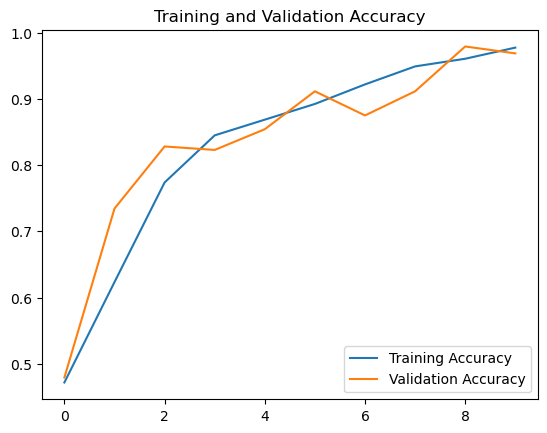

In [32]:
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

# Add a legend and title.
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Show the plot.
plt.show()

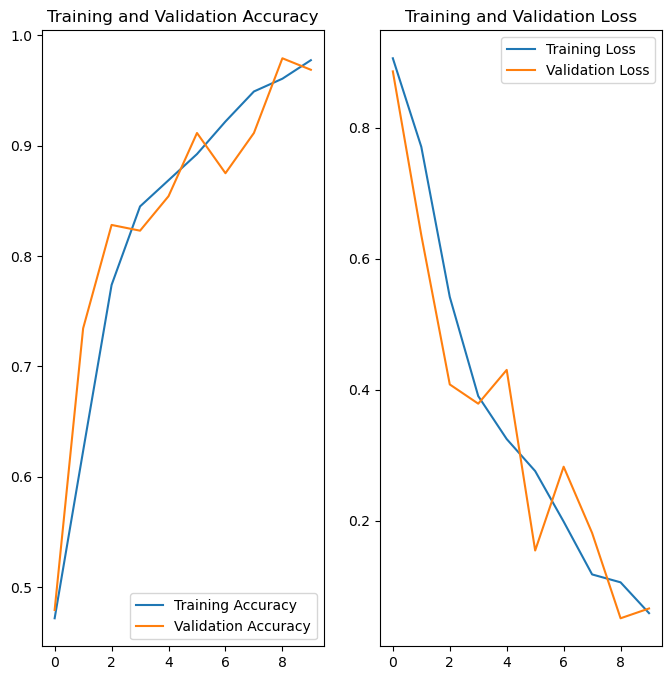

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction 

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Early_blight


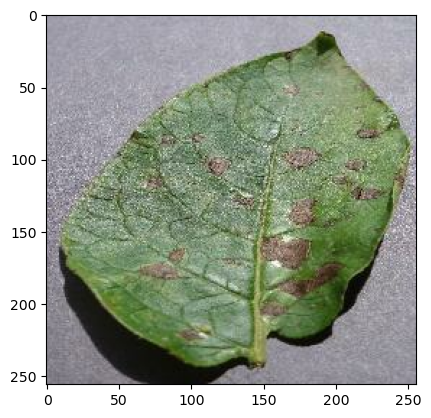

In [54]:
# Run this code again and again you found diff result 
for images_batch, labels_batch in test_ds.take(1):
        first_image = images_batch[0].numpy().astype('uint8')
        first_label = labels_batch[0].numpy()
        print("first image to predict")
        plt.imshow(first_image)
        print("actual label:",class_names[first_label])
        batch_prediction = model.predict(images_batch)
        print("predicted label:",class_names[np.argmax(batch_prediction[0])])    

# Conclusion

# The neurol network model has an accuracy of 97% on test dataset, and it's expected to perform with the equivalent accuracy level on future onseen data. 